## Data Ingestion

In [1]:
import os
from dotenv import load_dotenv
import pandas as pd

load_dotenv()

# Load AWS credentials

AWS_S3_BUCKET = os.environ.get('AWS_S3_BUCKET')
AWS_ACCESS_KEY_ID = os.environ.get('AWS_ACCESS_KEY_ID')
AWS_SECRET_ACCESS_KEY = os.environ.get('AWS_SECRET_ACCESS_KEY')

print(AWS_S3_BUCKET)

loan-default-prediction


In [22]:
applicationDf = pd.read_csv(
    f"s3://{AWS_S3_BUCKET}/dataset-3/application_data.csv",
    storage_options={
        "key": AWS_ACCESS_KEY_ID,
        "secret": AWS_SECRET_ACCESS_KEY,
    },
)

previousDf = pd.read_csv(
    f"s3://{AWS_S3_BUCKET}/dataset-3/previous_application.csv",
    storage_options={
        "key": AWS_ACCESS_KEY_ID,
        "secret": AWS_SECRET_ACCESS_KEY,
    },
)

applicationDf.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
previousDf.head(10)

NameError: name 'previousDf' is not defined

## EDA

In [24]:
dup_applicationDf = applicationDf
dup_previousDf = previousDf
print("applicationDf shape:" ,applicationDf.shape)
print("previousDf shape:" ,previousDf.shape)

applicationDf shape: (307511, 122)
previousDf shape: (1670214, 37)


In [25]:
dup_applicationDf.shape

(307511, 122)

In [26]:
applicationDf.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
# Null values percentage in each column
null_values = round(applicationDf.isnull().sum() / applicationDf.shape[0] * 100.00, 2)
print(null_values)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64


In [8]:
applicationDf_nullDf = pd.DataFrame(null_values.reset_index())
applicationDf_nullDf.columns = ['Column Name', 'Null values percentage']
applicationDf_nullDf.shape[0]

122

In [17]:
#unwanted_columns = df_nullDf['Column Name'].tolist()
unwanted_columns = applicationDf_nullDf[applicationDf_nullDf["Null values percentage"]>=40]['Column Name'].tolist()
len(unwanted_columns)

49

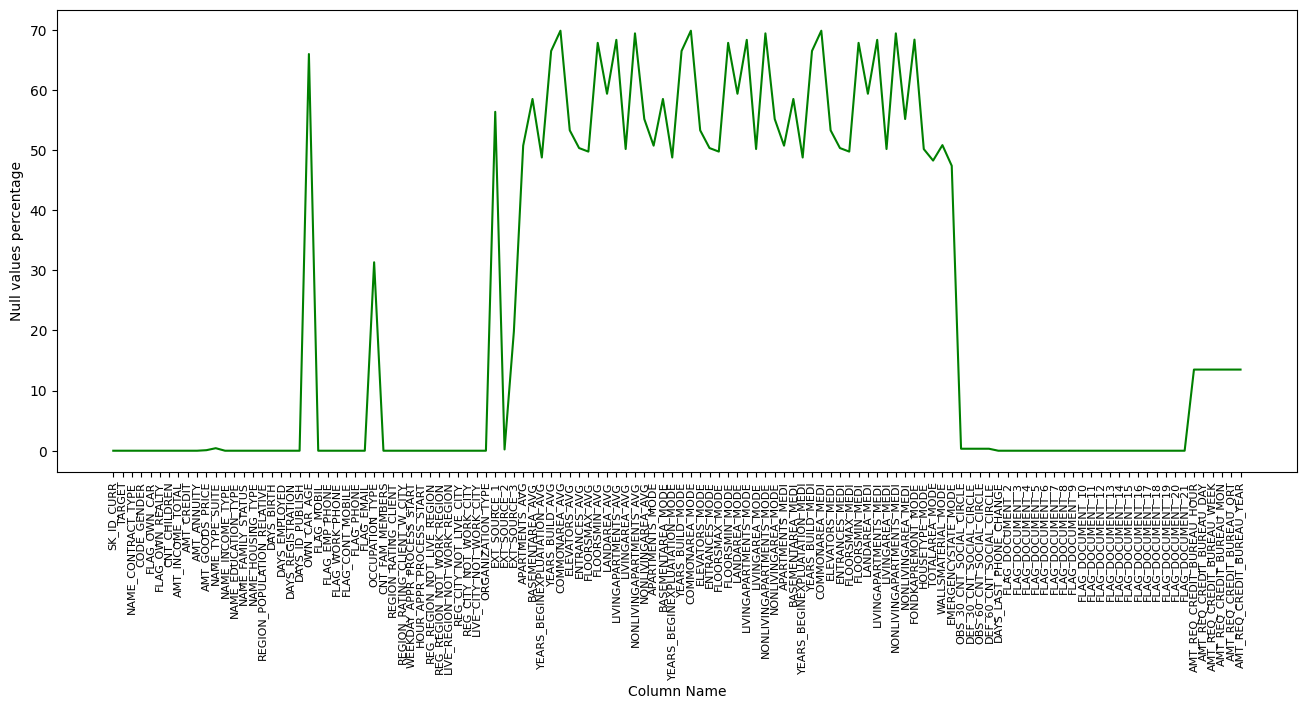

In [9]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

fig = plt.figure(figsize=(16,6))
chart = sns.lineplot(data=applicationDf_nullDf, x="Column Name", y="Null values percentage", color="green")
plt.xticks(rotation = 90, fontsize = 8)
plt.title = 'Null values percentage in each column'
plt.show()


In [31]:
applicationDf_nullDf[applicationDf_nullDf["Null values percentage"]>40].shape[0]/applicationDf.shape[1] * 100

40.16393442622951

Around 40% of the columns have more than 40% of null values.

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

def null_value_df(df: pd.DataFrame) -> pd.DataFrame:
    """This function takes the dataframe as input and provides another dataframe with \
        column names and percentage of null values in it"""

    null_values = round(df.isnull().sum() / df.shape[0] * 100.00, 2)
    null_df = pd.DataFrame(null_values.reset_index())
    null_df.columns = ["Column Name", "Null values percentage"]
    return null_df


def null_value_column_list(df: pd.DataFrame, percentage: float) -> list:
    """This function takes the dataframe, and float percentage value and provides \
        the list of column names with greater than or equal to the defined percentage"""

    null_df = null_value_df(df)
    column_list = null_df[null_df["Null values percentage"] >= percentage][
        "Column Name"
    ].tolist()
    return column_list


def convert_obj_to_cat(df: pd.DataFrame) -> pd.DataFrame:
    """This function takes the dataframe and converts the object datatype columns into categorical columns"""

    obj_columns = df.select_dtypes(include="object").columns.tolist()
    for col in obj_columns:
        df[col] = pd.Categorical(df[col])
    return df


def handle_null_values(df: pd.DataFrame) -> pd.DataFrame:
    """This functin takes the dataframe as input and imputes the null values in following ways:
    A. For numerical category type columns:
        1. If null value percentage is less than or equal to 15% then median() is used.
        2. If null value is above 15% then mean() is used.
    B. For Categorical type columns:
        1. If null value percentage is less than or equal to 15% then mode() is applied.
        2. If null value is above 15% then new "Unknown" category is created."""

    null_percentages = df.isnull().sum() / df.shape[0] * 100.00

    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # Numerical type column
            null_percentage = null_percentages[column]
            if null_percentage <= 15:
                # Apply median if null percentage is less than or equal to 15%
                df[column].fillna(df[column].median(), inplace=True)
            else:
                # Apply mean if null percentage is more than 15%
                df[column].fillna(df[column].mean(), inplace=True)
        elif pd.api.types.is_categorical_dtype(df[column]):
            # Categorical type column
            null_percentage = null_percentages[column]
            if null_percentage <= 15:
                # Apply mode if null percentage is less than or equal to 15%
                df[column].fillna((df[column].mode()[0]), inplace=True)
            else:
                # Create an unknown category if null percentage is more than 15%
                df[column] = df[column].cat.add_categories("Unknown")
                df[column].fillna("Unknown", inplace=True)
    return df


def label_encoding(df: pd.DataFrame) -> pd.DataFrame:
    """This function converts the categorical columns into numerical columns using labelencoder"""

    for column in df.columns:
        if pd.api.types.is_categorical_dtype(df[column]):
            df[column] = label_encoder.fit_transform(df[column])
    return df

In [28]:
unwanted_columns_applicationDf = null_value_column_list(applicationDf, 40) + [
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
    "FLAG_DOCUMENT_2",
    "FLAG_DOCUMENT_4",
    "FLAG_DOCUMENT_5",
    "FLAG_DOCUMENT_6",
    "FLAG_DOCUMENT_7",
    "FLAG_DOCUMENT_8",
    "FLAG_DOCUMENT_9",
    "FLAG_DOCUMENT_10",
    "FLAG_DOCUMENT_11",
    "FLAG_DOCUMENT_12",
    "FLAG_DOCUMENT_13",
    "FLAG_DOCUMENT_14",
    "FLAG_DOCUMENT_15",
    "FLAG_DOCUMENT_16",
    "FLAG_DOCUMENT_17",
    "FLAG_DOCUMENT_18",
    "FLAG_DOCUMENT_19",
    "FLAG_DOCUMENT_20",
    "FLAG_DOCUMENT_21",
    "FLAG_MOBIL",
    "FLAG_EMP_PHONE",
    "FLAG_WORK_PHONE",
    "FLAG_CONT_MOBILE",
    "FLAG_PHONE",
    "FLAG_EMAIL",
]

In [47]:
#applicationDf.drop(labels=unwanted_columns_applicationDf, axis=1, inplace=True)
#previousDf.drop(labels=unwanted_columns_previousDf, axis=1, inplace=True)

In [12]:
applicationDf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [29]:
# Standardizing DAYS_EMPLOYED values
applicationDf.loc[applicationDf["DAYS_EMPLOYED"]>0, "DAYS_EMPLOYED"] = 0

# Converting Negative days to positive days
date_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

for col in date_col:
    applicationDf[col] = abs(applicationDf[col])
    applicationDf[col] = applicationDf[col] //365

# Creating new column for Age
#applicationDf["AGE"] = applicationDf["DAYS_BIRTH"] // 365

# Creating new column for Employement Time
#applicationDf["YEARS_EMPLOYED"] = applicationDf["DAYS_EMPLOYED"] // 365


# Creating bins for income amount
applicationDf["AMT_INCOME_TOTAL"] = applicationDf["AMT_INCOME_TOTAL"] / 100000
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
slots = [
    "0-100K",
    "100K-200K",
    "200k-300k",
    "300k-400k",
    "400k-500k",
    "500k-600k",
    "600k-700k",
    "700k-800k",
    "800k-900k",
    "900k-1M",
    "1M Above",
]

applicationDf["AMT_INCOME_RANGE"] = pd.cut(
    applicationDf["AMT_INCOME_TOTAL"], bins, labels=slots
)

# Creating bins for Credit amount
applicationDf["AMT_CREDIT"] = applicationDf["AMT_CREDIT"] / 100000

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
slots = [
    "0-100K",
    "100K-200K",
    "200k-300k",
    "300k-400k",
    "400k-500k",
    "500k-600k",
    "600k-700k",
    "700k-800k",
    "800k-900k",
    "900k-1M",
    "1M Above",
]

applicationDf["AMT_CREDIT_RANGE"] = pd.cut(
    applicationDf["AMT_CREDIT"], bins=bins, labels=slots
)

unwanted_columns_applicationDf = unwanted_columns_applicationDf + [
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
]

# Dropping unwanted columns from application dataset.
applicationDf.drop(labels=unwanted_columns_applicationDf, axis=1, inplace=True)

In [30]:
# Converting object datatype columns into categorical columns
applicationDf = convert_obj_to_cat(applicationDf)

In [31]:
unwanted_columns_previousDf = null_value_column_list(previousDf, 40) + [
    "WEEKDAY_APPR_PROCESS_START",
    "HOUR_APPR_PROCESS_START",
    "FLAG_LAST_APPL_PER_CONTRACT",
    "NFLAG_LAST_APPL_IN_DAY",
]

# Standardizing "SELLERPLACE_AREA" columns
previousDf.loc[previousDf["SELLERPLACE_AREA"]<0, "SELLERPLACE_AREA"] = 0

# Converting negative days to positive days
previousDf["DAYS_DECISION"] = abs(previousDf["DAYS_DECISION"])

# age group calculation e.g. 388 will be grouped as 300-400
previousDf["DAYS_DECISION_GROUP"] = (
    (previousDf["DAYS_DECISION"] - (previousDf["DAYS_DECISION"] % 400)).astype(str)
    + "-"
    + (
        (previousDf["DAYS_DECISION"] - (previousDf["DAYS_DECISION"] % 400))
        + (previousDf["DAYS_DECISION"] % 400)
        + (400 - (previousDf["DAYS_DECISION"] % 400))
    ).astype(str)
)

# Adding DAYS_DECISION to unwanted columns list
unwanted_columns_previousDf = unwanted_columns_previousDf + ["DAYS_DECISION"]

# Dropping unwanted columns from previous application dataset.
previousDf.drop(labels=unwanted_columns_previousDf, axis=1, inplace=True)

# Converting object datatype columns into categorical columns
previousDf = convert_obj_to_cat(previousDf)

In [32]:
# Imputing Null Values in applicationDf
applicationDf = handle_null_values(applicationDf)

In [33]:
previousDf["AMT_ANNUITY"].fillna(previousDf["AMT_ANNUITY"].median(), inplace=True)
previousDf["AMT_GOODS_PRICE"].fillna(
    previousDf["AMT_GOODS_PRICE"].mode()[0], inplace=True
)
previousDf["CNT_PAYMENT"].fillna(0, inplace=True)
previousDf.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,Cash through the bank,...,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,0-400
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,XNA,...,XNA,Cash,x-sell,Contact center,0,XNA,36.0,low_action,Cash X-Sell: low,0-400
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,Cash through the bank,...,XNA,Cash,x-sell,Credit and cash offices,0,XNA,12.0,high,Cash X-Sell: high,0-400
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,Cash through the bank,...,XNA,Cash,x-sell,Credit and cash offices,0,XNA,12.0,middle,Cash X-Sell: middle,400-800
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,Cash through the bank,...,XNA,Cash,walk-in,Credit and cash offices,0,XNA,24.0,high,Cash Street: high,400-800
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,Everyday expenses,Approved,Cash through the bank,...,XNA,Cash,x-sell,Credit and cash offices,0,XNA,18.0,low_normal,Cash X-Sell: low,400-800
6,2315218,175704,Cash loans,11250.000,0.0,0.0,45000.0,XNA,Canceled,XNA,...,XNA,XNA,XNA,Credit and cash offices,0,XNA,0.0,XNA,Cash,0-400
7,1656711,296299,Cash loans,11250.000,0.0,0.0,45000.0,XNA,Canceled,XNA,...,XNA,XNA,XNA,Credit and cash offices,0,XNA,0.0,XNA,Cash,0-400
8,2367563,342292,Cash loans,11250.000,0.0,0.0,45000.0,XNA,Canceled,XNA,...,XNA,XNA,XNA,Credit and cash offices,0,XNA,0.0,XNA,Cash,0-400
9,2579447,334349,Cash loans,11250.000,0.0,0.0,45000.0,XNA,Canceled,XNA,...,XNA,XNA,XNA,Credit and cash offices,0,XNA,0.0,XNA,Cash,0-400


In [34]:
applicationDf.describe().loc[['min', 'max']].T

,min,max
SK_ID_CURR,100002.00000,4.562550e+05
TARGET,0.00000,1.000000e+00
CNT_CHILDREN,0.00000,1.900000e+01
AMT_ANNUITY,1615.50000,2.580255e+05
AMT_GOODS_PRICE,40500.00000,4.050000e+06
REGION_POPULATION_RELATIVE,0.00029,7.250800e-02
DAYS_REGISTRATION,0.00000,6.700000e+01
DAYS_ID_PUBLISH,0.00000,1.900000e+01
CNT_FAM_MEMBERS,1.00000,2.000000e+01
REGION_RATING_CLIENT,1.00000,3.000000e+00


## Merged Dataframe

In [35]:
loan_process_df = pd.merge(applicationDf, previousDf, how='inner', on='SK_ID_CURR')
loan_process_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
SK_ID_CURR,100002,100003,100003,100003,100004,100006,100006,100006,100006,100006
TARGET,1,0,0,0,0,0,0,0,0,0
NAME_CONTRACT_TYPE_x,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,M,F,F,F,M,F,F,F,F,F
FLAG_OWN_CAR,N,N,N,N,Y,N,N,N,N,N
FLAG_OWN_REALTY,Y,N,N,N,Y,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0,0,0,0,0,0
AMT_ANNUITY_x,24700.5,35698.5,35698.5,35698.5,6750.0,29686.5,29686.5,29686.5,29686.5,29686.5
AMT_GOODS_PRICE_x,351000.0,1129500.0,1129500.0,1129500.0,135000.0,297000.0,297000.0,297000.0,297000.0,297000.0
NAME_TYPE_SUITE,Unaccompanied,Family,Family,Family,Unaccompanied,Unaccompanied,Unaccompanied,Unaccompanied,Unaccompanied,Unaccompanied


In [36]:
print("Loan_Process_Df Shape: ",loan_process_df.shape)

Loan_Process_Df Shape:  (1413701, 65)


In [37]:
loan_process_df.isnull().sum() / loan_process_df.shape[0]

SK_ID_CURR                     0.000000e+00
TARGET                         0.000000e+00
NAME_CONTRACT_TYPE_x           0.000000e+00
CODE_GENDER                    0.000000e+00
FLAG_OWN_CAR                   0.000000e+00
FLAG_OWN_REALTY                0.000000e+00
CNT_CHILDREN                   0.000000e+00
AMT_ANNUITY_x                  0.000000e+00
AMT_GOODS_PRICE_x              0.000000e+00
NAME_TYPE_SUITE                0.000000e+00
NAME_INCOME_TYPE               0.000000e+00
NAME_EDUCATION_TYPE            0.000000e+00
NAME_FAMILY_STATUS             0.000000e+00
NAME_HOUSING_TYPE              0.000000e+00
REGION_POPULATION_RELATIVE     0.000000e+00
DAYS_REGISTRATION              0.000000e+00
DAYS_ID_PUBLISH                0.000000e+00
OCCUPATION_TYPE                0.000000e+00
CNT_FAM_MEMBERS                0.000000e+00
REGION_RATING_CLIENT           0.000000e+00
REGION_RATING_CLIENT_W_CITY    0.000000e+00
WEEKDAY_APPR_PROCESS_START     0.000000e+00
HOUR_APPR_PROCESS_START        0

In [38]:
for column in loan_process_df.columns:
    if pd.api.types.is_categorical_dtype(loan_process_df[column]):
        print(f"{column} : {loan_process_df[column].nunique()}")

NAME_CONTRACT_TYPE_x : 2
CODE_GENDER : 3
FLAG_OWN_CAR : 2
FLAG_OWN_REALTY : 2
NAME_TYPE_SUITE : 7
NAME_INCOME_TYPE : 7
NAME_EDUCATION_TYPE : 5
NAME_FAMILY_STATUS : 5
NAME_HOUSING_TYPE : 6
OCCUPATION_TYPE : 19
WEEKDAY_APPR_PROCESS_START : 7
ORGANIZATION_TYPE : 58
AMT_INCOME_RANGE : 11
AMT_CREDIT_RANGE : 11
NAME_CONTRACT_TYPE_y : 4
NAME_CASH_LOAN_PURPOSE : 25
NAME_CONTRACT_STATUS : 4
NAME_PAYMENT_TYPE : 4
CODE_REJECT_REASON : 9
NAME_CLIENT_TYPE : 4
NAME_GOODS_CATEGORY : 27
NAME_PORTFOLIO : 5
NAME_PRODUCT_TYPE : 3
CHANNEL_TYPE : 8
NAME_SELLER_INDUSTRY : 11
NAME_YIELD_GROUP : 5
PRODUCT_COMBINATION : 17
DAYS_DECISION_GROUP : 8


In [39]:
loan_process_df_tx = label_encoding(loan_process_df)
loan_process_df_tx.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 65 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   TARGET                       1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  int32  
 3   CODE_GENDER                  1413701 non-null  int32  
 4   FLAG_OWN_CAR                 1413701 non-null  int32  
 5   FLAG_OWN_REALTY              1413701 non-null  int32  
 6   CNT_CHILDREN                 1413701 non-null  int64  
 7   AMT_ANNUITY_x                1413701 non-null  float64
 8   AMT_GOODS_PRICE_x            1413701 non-null  float64
 9   NAME_TYPE_SUITE              1413701 non-null  int32  
 10  NAME_INCOME_TYPE             1413701 non-null  int32  
 11  NAME_EDUCATION_TYPE          1413701 non-null  int32  
 12  NAME_FAMILY_STATUS           1413701 non-n

In [40]:
pd.set_option('display.max_rows', None)
loan_process_df_tx.describe().loc[['min', 'max']].T

,min,max
SK_ID_CURR,1.000020e+05,4.562550e+05
TARGET,0.000000e+00,1.000000e+00
NAME_CONTRACT_TYPE_x,0.000000e+00,1.000000e+00
CODE_GENDER,0.000000e+00,2.000000e+00
FLAG_OWN_CAR,0.000000e+00,1.000000e+00
FLAG_OWN_REALTY,0.000000e+00,1.000000e+00
CNT_CHILDREN,0.000000e+00,1.900000e+01
AMT_ANNUITY_x,1.615500e+03,2.250000e+05
AMT_GOODS_PRICE_x,4.050000e+04,4.050000e+06
NAME_TYPE_SUITE,0.000000e+00,6.000000e+00


In [43]:
unique = loan_process_df_tx.nunique()
# unique[unique > 500]

uniqueDf = pd.DataFrame(unique.reset_index())
uniqueDf.columns = ['Column Name', 'Unique Values']
unique_columns = uniqueDf[uniqueDf["Unique Values"]>=500]['Column Name'].tolist()

print(len(unique_columns))
unique[unique > 500]

9


SK_ID_CURR            291057
AMT_ANNUITY_x          13371
AMT_GOODS_PRICE_x        986
SK_ID_PREV           1413701
AMT_ANNUITY_y         329537
AMT_APPLICATION        86766
AMT_CREDIT             81730
AMT_GOODS_PRICE_y      86766
SELLERPLACE_AREA        2076
dtype: int64

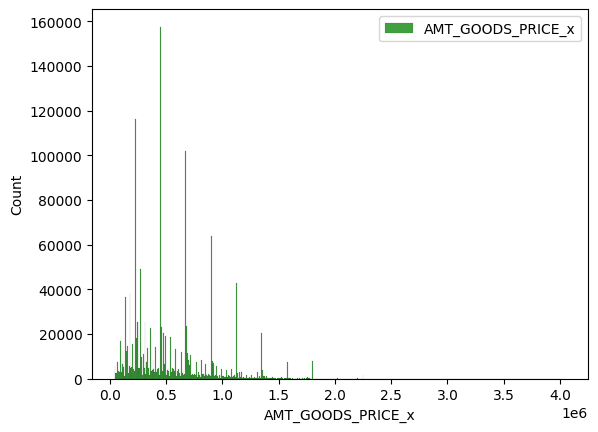

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=loan_process_df["AMT_GOODS_PRICE_x"], color='green', label="AMT_GOODS_PRICE_x")


plt.legend()

plt.show()

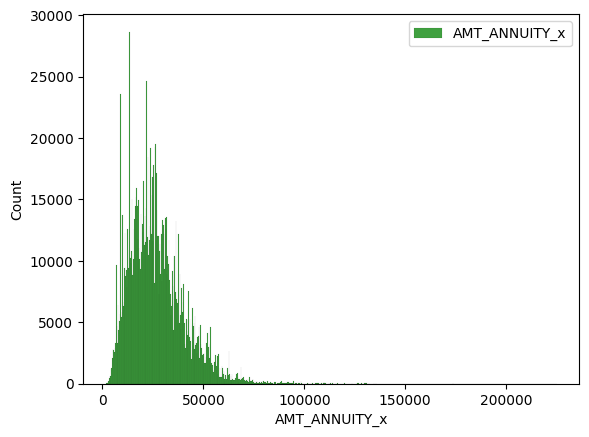

In [50]:
sns.histplot(data=loan_process_df["AMT_ANNUITY_x"], color='green', label="AMT_ANNUITY_x")


plt.legend()

plt.show()

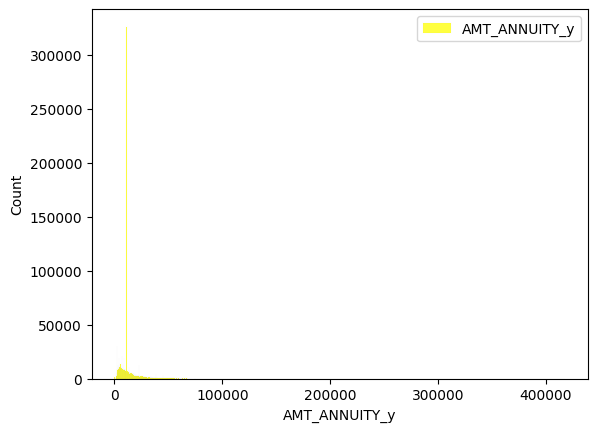

In [51]:
sns.histplot(data=loan_process_df["AMT_ANNUITY_y"], color='yellow', label="AMT_ANNUITY_y")


plt.legend()

plt.show()

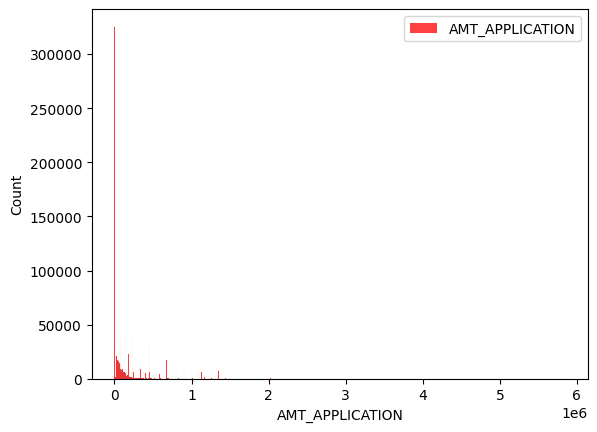

In [52]:
sns.histplot(data=loan_process_df["AMT_APPLICATION"], color='red', label="AMT_APPLICATION")

plt.legend()

plt.show()

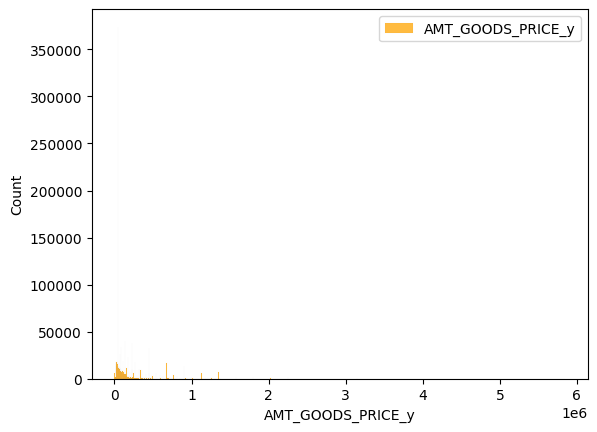

In [53]:
sns.histplot(data=loan_process_df["AMT_GOODS_PRICE_y"], color='orange', label="AMT_GOODS_PRICE_y")

plt.legend()

plt.show()

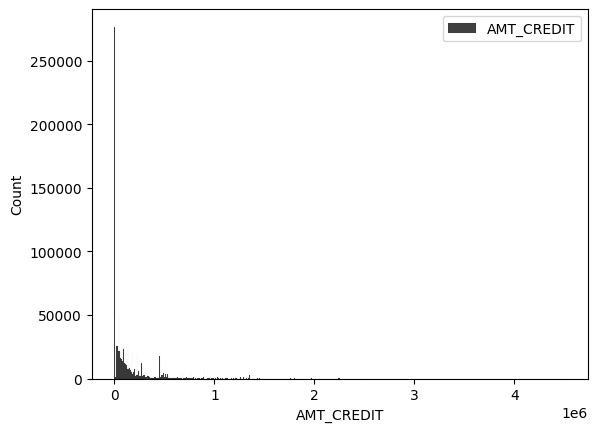

In [54]:
sns.histplot(data=loan_process_df["AMT_CREDIT"], color='black', label="AMT_CREDIT")

plt.legend()

plt.show()

In [1]:
loan_process_df_tx[unique_columns].describe().T

NameError: name 'loan_process_df_tx' is not defined